> В данном примере показано как визуализировать тепловую карту класса на примере модели классификации изображений

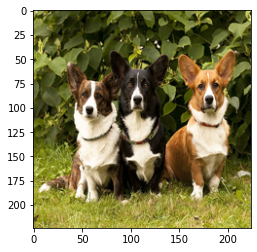

In [56]:
import numpy as np
import ast #to easily read out class text file that contains some unknwn syntax.
import scipy   #to upscale the image
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model   
from PIL import Image

#Read an image (containing an object from one of the 1000 resnet50 classes.)
img = cv2.imread('9_1.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = Image.fromarray(img, 'RGB')
img = img.resize((224, 224))
img = np.array(img)
plt.imshow(img)

In [57]:
img_tensor = np.expand_dims(img, axis=0)
preprocessed_img = preprocess_input(img_tensor)

#Import the resnet50 model
model = ResNet50(weights='imagenet')
print(model.summary()) #Notice the Global Average Pooling layer at the last but one

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [58]:
import pydot
import pydotplus
import graphviz

In [59]:
model.save('my_model.h5')

In [60]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [61]:
#Get weights for the prediction layer (last layer)
#We should see 2048 weights for each of the 1000 classes (2048,1000)
last_layer_weights = model.layers[-1].get_weights()[0]  #Predictions layer

In [62]:
last_layer_weights.shape

(2048, 1000)

In [14]:
last_layer_weights = model.layers

In [16]:
config = model.get_config()

In [18]:
#config

In [63]:
#Output both predictions (last layer) and conv5_block3_add (just before final activation layer)
ResNet_model = Model(inputs=model.input, 
        outputs=(model.layers[-4].output, model.layers[-1].output)) 

In [20]:
ResNet_model.save('my_model_r.h5')

In [64]:
%%time
for _ in range(10):
#Get the predictions and the output of last conv. layer. 
    last_conv_output, pred_vec = ResNet_model.predict(preprocessed_img)

Wall time: 1.39 s


In [65]:
import tensorflow as tf
print(tf.test.gpu_device_name())

/device:GPU:0


In [66]:
%%time
for _ in range(10):
#Get the predictions and the output of last conv. layer. 
    last_conv_output, pred_vec = ResNet_model.predict(preprocessed_img)

Wall time: 554 ms


In [67]:
last_conv_output.shape

(1, 7, 7, 2048)

In [68]:
pred_vec.shape

(1, 1000)

In [69]:
last_conv_output = np.squeeze(last_conv_output) #7x7x2048
#Prediction for the image
pred = np.argmax(pred_vec)


In [70]:
pred

264

---

In [31]:
last_conv_output.shape

(7, 7, 2048)

In [39]:
x = np.array([[[0], [1], [2]]])
print(x.shape)
x=np.squeeze(x)

(1, 3, 1)


In [41]:
x.shape

(3,)

---

In [71]:
# spline interpolation to resize each filtered image to size of original image 
h = int(img.shape[0]/last_conv_output.shape[0])
w = int(img.shape[1]/last_conv_output.shape[1])
upsampled_last_conv_output = scipy.ndimage.zoom(last_conv_output, (h, w, 1), order=1) # dim: 224 x 224 x 2048

In [72]:
w

32

In [73]:
h

32

In [74]:
upsampled_last_conv_output.shape

(224, 224, 2048)

In [75]:
last_conv_output.shape

(7, 7, 2048)

In [76]:
#Get the weights from the last layer for the prediction class
last_layer_weights_for_pred = last_layer_weights[:, pred] # dim: (2048,) 

In [77]:
%%time
#To generate the final heat map. 
#Reshape the upsampled last conv. output to n x filters and multiply (dot product) 
# with the last layer weigths for the prediction. 
# Reshape back to the image size for easy overlay onto the original image. 
heat_map = np.dot(upsampled_last_conv_output.reshape((224*224, 2048)), 
                  last_layer_weights_for_pred).reshape(224,224) # dim: 224 x 224

Wall time: 14 ms


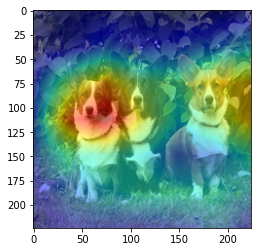

In [78]:
fig, ax = plt.subplots()
ax.imshow(img)
ax.imshow(heat_map, cmap='jet', alpha=0.5) 
plt.show()

In [80]:
last_layer_weights_for_pred.shape

(2048,)

In [86]:
upsampled_last_conv_output.shape

(224, 224, 2048)

In [5]:
import time
import threading
from threading import Thread
x=0

def sleepMe(i):
    print("Поток %i засыпает на 5 секунд." % i)
    time.sleep(5)
    global x
    x+=1
    print(x)
    print("Поток %i сейчас проснулся." % i)

for i in range(10):
    th = Thread(target=sleepMe, args=(i, ))
    th.start()
    print("Запущено потоков: %i." % threading.active_count())

Поток 0 засыпает на 5 секунд.
Запущено потоков: 7.
Поток 1 засыпает на 5 секунд.
Запущено потоков: 8.
Поток 2 засыпает на 5 секунд.
Запущено потоков: 9.
Поток 3 засыпает на 5 секунд.Запущено потоков: 10.

Поток 4 засыпает на 5 секунд.
Запущено потоков: 11.
Поток 5 засыпает на 5 секунд.Запущено потоков: 12.

Поток 6 засыпает на 5 секунд.
Запущено потоков: 13.
Поток 7 засыпает на 5 секунд.
Запущено потоков: 14.
Поток 8 засыпает на 5 секунд.Запущено потоков: 15.

Поток 9 засыпает на 5 секунд.
Запущено потоков: 16.
Поток 10 засыпает на 5 секунд.
Запущено потоков: 17.
Поток 11 засыпает на 5 секунд.
Запущено потоков: 18.
Поток 12 засыпает на 5 секунд.
Запущено потоков: 19.
Поток 13 засыпает на 5 секунд.Запущено потоков: 20.

Поток 14 засыпает на 5 секунд.
Запущено потоков: 21.
Поток 15 засыпает на 5 секунд.Запущено потоков: 22.

Поток 16 засыпает на 5 секунд.Запущено потоков: 23.

Поток 17 засыпает на 5 секунд.
Запущено потоков: 24.
Поток 18 засыпает на 5 секунд.Запущено потоков: 25.

Поток 

Запущено потоков: 176.
Поток 170 засыпает на 5 секунд.
Запущено потоков: 177.
Поток 171 засыпает на 5 секунд.Запущено потоков: 178.

Поток 172 засыпает на 5 секунд.Запущено потоков: 179.
Поток 173 засыпает на 5 секунд.
Запущено потоков: 180.

Поток 174 засыпает на 5 секунд.Запущено потоков: 181.
Поток 175 засыпает на 5 секунд.
Запущено потоков: 182.

Поток 176 засыпает на 5 секунд.Запущено потоков: 183.

Поток 177 засыпает на 5 секунд.
Запущено потоков: 184.
Поток 178 засыпает на 5 секунд.
Запущено потоков: 185.
Поток 179 засыпает на 5 секунд.
Запущено потоков: 186.
Поток 180 засыпает на 5 секунд.
Запущено потоков: 187.
Поток 181 засыпает на 5 секунд.
Запущено потоков: 188.
Поток 182 засыпает на 5 секунд.Запущено потоков: 189.

Поток 183 засыпает на 5 секунд.
Запущено потоков: 190.
Поток 184 засыпает на 5 секунд.
Запущено потоков: 191.
Поток 185 засыпает на 5 секунд.Запущено потоков: 192.

Поток 186 засыпает на 5 секунд.
Запущено потоков: 193.
Поток 187 засыпает на 5 секунд.
Запущено п


Поток 342 засыпает на 5 секунд.Запущено потоков: 349.
Поток 343 засыпает на 5 секунд.
Запущено потоков: 350.

Поток 344 засыпает на 5 секунд.Запущено потоков: 351.

Поток 345 засыпает на 5 секунд.
Запущено потоков: 352.
Поток 346 засыпает на 5 секунд.Запущено потоков: 353.

Поток 347 засыпает на 5 секунд.
Запущено потоков: 354.
Поток 348 засыпает на 5 секунд.
Запущено потоков: 355.
Поток 349 засыпает на 5 секунд.
Запущено потоков: 356.
Поток 350 засыпает на 5 секунд.
Запущено потоков: 357.
Поток 351 засыпает на 5 секунд.
Запущено потоков: 358.
Поток 352 засыпает на 5 секунд.
Запущено потоков: 359.
Поток 353 засыпает на 5 секунд.
Запущено потоков: 360.
Поток 354 засыпает на 5 секунд.
Запущено потоков: 361.
Поток 355 засыпает на 5 секунд.
Запущено потоков: 362.
Поток 356 засыпает на 5 секунд.Запущено потоков: 363.

Поток 357 засыпает на 5 секунд.
Запущено потоков: 364.
Поток 358 засыпает на 5 секунд.Запущено потоков: 365.

Поток 359 засыпает на 5 секунд.
Запущено потоков: 366.
Поток 360

Поток 501 засыпает на 5 секунд.Запущено потоков: 508.

Поток 502 засыпает на 5 секунд.
Запущено потоков: 509.
Поток 503 засыпает на 5 секунд.
Запущено потоков: 510.
Поток 504 засыпает на 5 секунд.
Запущено потоков: 511.
Поток 505 засыпает на 5 секунд.
Запущено потоков: 512.
Поток 506 засыпает на 5 секунд.
Запущено потоков: 513.
Поток 507 засыпает на 5 секунд.Запущено потоков: 514.

Поток 508 засыпает на 5 секунд.Запущено потоков: 515.

Поток 509 засыпает на 5 секунд.
Запущено потоков: 516.
Поток 510 засыпает на 5 секунд.
Запущено потоков: 517.
Поток 511 засыпает на 5 секунд.Запущено потоков: 518.

Поток 512 засыпает на 5 секунд.Запущено потоков: 519.

Поток 513 засыпает на 5 секунд.Запущено потоков: 520.

Поток 514 засыпает на 5 секунд.Запущено потоков: 521.

Поток 515 засыпает на 5 секунд.Запущено потоков: 522.

Поток 516 засыпает на 5 секунд.Запущено потоков: 523.

Поток 517 засыпает на 5 секунд.
Запущено потоков: 524.
Поток 518 засыпает на 5 секунд.Запущено потоков: 525.

Поток 519 


Поток 663 засыпает на 5 секунд.
Запущено потоков: 670.
Поток 664 засыпает на 5 секунд.
Запущено потоков: 671.
Поток 665 засыпает на 5 секунд.
Запущено потоков: 672.
Поток 666 засыпает на 5 секунд.Запущено потоков: 673.

Поток 667 засыпает на 5 секунд.
Запущено потоков: 674.
Поток 668 засыпает на 5 секунд.
Запущено потоков: 675.
Поток 669 засыпает на 5 секунд.
Запущено потоков: 676.
Поток 670 засыпает на 5 секунд.
Запущено потоков: 677.
Поток 671 засыпает на 5 секунд.Запущено потоков: 678.

Поток 672 засыпает на 5 секунд.
Запущено потоков: 679.
Поток 673 засыпает на 5 секунд.
Запущено потоков: 680.
Поток 674 засыпает на 5 секунд.Запущено потоков: 681.

Поток 675 засыпает на 5 секунд.
Запущено потоков: 682.
Поток 676 засыпает на 5 секунд.
Запущено потоков: 683.
Поток 677 засыпает на 5 секунд.Запущено потоков: 684.

Поток 678 засыпает на 5 секунд.
Запущено потоков: 685.
Поток 679 засыпает на 5 секунд.Запущено потоков: 686.

Поток 680 засыпает на 5 секунд.
Запущено потоков: 687.
Поток 681


Поток 824 засыпает на 5 секунд.Запущено потоков: 831.

Поток 825 засыпает на 5 секунд.
Запущено потоков: 832.
Поток 826 засыпает на 5 секунд.Запущено потоков: 833.

Поток 827 засыпает на 5 секунд.Запущено потоков: 834.

Поток 828 засыпает на 5 секунд.Запущено потоков: 835.
Поток 829 засыпает на 5 секунд.
Запущено потоков: 836.

Поток 830 засыпает на 5 секунд.
Запущено потоков: 837.
Поток 831 засыпает на 5 секунд.
Запущено потоков: 838.
Поток 832 засыпает на 5 секунд.
Запущено потоков: 839.
Поток 833 засыпает на 5 секунд.
Запущено потоков: 840.
Поток 834 засыпает на 5 секунд.
Запущено потоков: 841.
Поток 835 засыпает на 5 секунд.
Запущено потоков: 842.
Поток 836 засыпает на 5 секунд.
Запущено потоков: 843.
Поток 837 засыпает на 5 секунд.
Запущено потоков: 844.
Поток 838 засыпает на 5 секунд.
Запущено потоков: 845.
Поток 839 засыпает на 5 секунд.
Запущено потоков: 846.
Поток 840 засыпает на 5 секунд.Запущено потоков: 847.

Поток 841 засыпает на 5 секунд.
Запущено потоков: 848.
Поток 842

Запущено потоков: 997.
Поток 991 засыпает на 5 секунд.
Запущено потоков: 998.
Поток 992 засыпает на 5 секунд.
Запущено потоков: 999.
Поток 993 засыпает на 5 секунд.
Запущено потоков: 1000.
Поток 994 засыпает на 5 секунд.
Запущено потоков: 1001.
Поток 995 засыпает на 5 секунд.
Запущено потоков: 1002.
Поток 996 засыпает на 5 секунд.
Запущено потоков: 1003.
Поток 997 засыпает на 5 секунд.
Запущено потоков: 1004.
Поток 998 засыпает на 5 секунд.
Запущено потоков: 1005.
Поток 999 засыпает на 5 секунд.
Запущено потоков: 1006.


In [14]:
import multiprocessing
class MyProcess(multiprocessing.Process):
   def run(self):
       print ('called run method in process: %s' %self.name)
       return
if __name__ == '__main__':
   jobs = []
   for i in range(5):
       P = MyProcess()
       jobs.append(P)
       P.start()
       P.join()

У каждого процесса - своя память. Это означает, что у каждого процесса своя копия переменной rr. Когда один процесс ее модифицирует (у себя в памяти), другой этого не видит, он видит то значение, которое было у переменной, в момент создания процесса (когда память скопировалась из родительского процесса).

Для того, чтоб можно было обмениваться данными между процессами, нужно использовать специальные механизмы межпроцессного взаимодействия, представленные утилитами из модуля multiprocessing.

In [15]:
import multiprocessing
import time
from random import randint
y=0
def countUp():
    global y;
    i = 0
    while i <= 3:
        print('Up:\t{}'.format(i))
        time.sleep(randint(1, 3)) # sleep 1, 2 or 3 seconds
        i += 1
        y+=1
        print(f"y = {y}")

def countDown():
    global y;
    i = 3
    while i >= 0:
        print('Down:\t{}'.format(i))
        time.sleep(randint(1, 3)) # sleep 1, 2 or 3 seconds
        i -= 1
        y-=1
        print(f"y = {y}")

if __name__ == '__main__':
    # Initiate the workers.
    workerUp = multiprocessing.Process(target=countUp)
    workerDown = multiprocessing.Process(target=countDown)

    # Start the workers.
    workerUp.start()
    workerDown.start()

    # Join the workers. This will block in the main (parent) process
    # until the workers are complete.
    workerUp.join()
    workerDown.join()
    print('-'*20)
    print(f" y= {y}")

In [ ]:
import multiprocessing
from functools import partial
r=0
rr = 0
def one(rr):
    while True:
        print(rr.value)

def stream(rr):
    global st
    with sd.Stream(callback=partial(print_sound, rr)):
        sd.sleep(1000000)

def print_sound(rr, indata, outdata, frames, time, status):
    volume_norm = np.linalg.norm(indata)*10
    r = int(volume_norm)
    rr.value += r

if __name__ == '__main__':
    manager = multiprocessing.Manager()
    rr = manager.Value('rr', 0)
    p1 = multiprocessing.Process(target=stream, args=(rr,))
    p3 = multiprocessing.Process(target=one, args=(rr,))
    p1.start()
    p3.start()
    p1.join()
    p3.join()

---

In [3]:
0.1 + 0.2 == 0.3

False

In [7]:
round(0.3,3) + round(0.3, 3) == round(0.6,3)

True